<a href="https://colab.research.google.com/github/bheanne/LinearAlgebra/blob/main/MIDTERMS%20EXAM/Marq_LinAlg_Midterms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Linear Algebra (CpE210A)

<h3>Midterms Project

Coded and submitted by:<br>
<i>Marquita, Bhea Marrianne J.<br>
    201911991 <br>
   58051 </i>

Directions
This Jupyter Notebook will serve as your base code for your Midterm Project. You must further format and provide complete discussion on the given topic. 
- Provide all necessary explanations for specific code blocks. 
- Provide illustrations for key results.
- Observe clean code (intuitive variable names, proper commenting, proper code spacing)
- Provide a summary discussion at the end

Failure to use this format or failure to update the document will be given a deduction equivalent to 50% of the original score. 

### Case

Bebang is back to consult you about her business. Furthering her data analytics initiative she asks you for help to compute some relevant data. Now she is asking you to compute and visualize her sales and costs for the past year. She has given you the datasets attached to her request.

### Problem

State and explain Bebang's problem here and provide the deliverables.

# Proof of Concept

Now that you have a grasp on the requirements we need to start with making a program to prove that her problem is solvable. As a Linear Algebra student, we will be focusin on applying vector operations to meet her needs. First, we need to import her data. We will use the `pandas` library for this. For more information you can look into their documentation [here](https://pandas.pydata.org/).

In [52]:
import pandas as pd

file_prices = "/content/bebang prices.csv"
file_sales = "/content/bebang sales.csv"

df_prices = pd.read_csv(file_prices, index_col=0)
df_sales = pd.read_csv(file_sales)


## Let's check what's in df_prices
df_prices

,red velvet,oreo,sugar glazed,almond honey,matcha,strawberry cream,brown sugar boba,furits and nuts,dark chocolate,chocolate and orange,choco mint,choco butter naught
price per piece,35,25,20,35,50,40,40,45,30,40,45,45
cost per piece,25,15,10,20,35,31,30,25,15,25,32,31


In [53]:
## Let's check the sales dataframe
df_sales

,flavor,january,february,march,april,may,june,july,august,september,october,november,december
0,red velvet,781,524,364,157,894,56,89,41,23,78,231,899
1,oreo,210,324,344,32,123,1,3,0,1,6,312,548
2,sugar glazed,599,674,854,14,467,78,36,48,75,98,781,1602
3,almond honey,124,112,114,23,198,12,32,41,23,36,300,566
4,matcha,645,498,885,98,177,98,43,96,26,71,549,897
5,strawberry cream,210,372,369,78,163,26,45,22,54,41,207,456
6,brown sugar boba,981,380,154,14,147,15,98,33,23,36,552,633
7,furits and nuts,478,462,354,49,89,0,1,0,1,8,335,214
8,dark chocolate,598,203,36,96,789,4,5,0,8,0,789,458
9,chocolate and orange,324,123,48,32,65,74,78,45,89,100,632,231


## Part 1: Monthly Sales

In [55]:
import numpy as np
### Vectorizing the data

sales_mat = np.array(df_sales.set_index('flavor'))
prices_mat = np.array(df_prices)[0] ## reshape this vector to the appropriate size
costs_mat = np.array(df_prices)[1] ## reshape this vector to the appropriate size

## Do not alter these lines
print(sales_mat.shape)
print(prices_mat.shape)
print(costs_mat.shape)
# Expected Output
# (12, 12)
# (12, 1)
# (12, 1)

(12, 12)
(12,)
(12,)


#### Formulas

Take note that the fomula for revenue is: <br>
$revenue = sales * price $ <br>
In this case, think that revenue, sales, and price are vectors instead of individual values <br>
The formula of cost per item sold is: <br>
$cost_{sold} = sales * cost$ <br>
The formula for profit is: <br>
$profit = revenue - cost_{sold}$ <br>
Solving for the monthly profit will be the sum of all profits made on that month.

In [56]:
#Create a function that *returns* and prints the monthly sales and profit for each month 
def monthly_sales(price, cost, sales):
    monthly_revenue = sales*price
    monthly_costs = sales*cost
    monthly_profits = monthly_revenue - monthly_costs

    m_profits = monthly_profits.T
    profitmonth = m_profits.sum(axis = 1)

    df_monthlyprofit = pd.DataFrame(profitmonth)
    df_monthlyprofit.columns = ["Monthly Profits"]
    df_monthlyprofit.index = ['January','February',
                       'March','April','May',
                       'June','July','August',
                       'September','October',
                       'November','December']

    print(df_monthlyprofit)
    return monthly_revenue.flatten(), monthly_costs.flatten(), monthly_profits.flatten()

In [57]:
### Do not alter this cell
month_rev, month_cost, month_profit = monthly_sales(prices_mat, costs_mat, sales_mat)
### print the values
print("\nMonthly Revenue")
print(month_rev)
print("\nMonthly Cost")
print(month_cost)
print("\nMonthly Profit")
print(month_profit)

           Monthly Profits
January              61860
February             46700
March                42450
April                11565
May                  62655
June                  3906
July                  4690
August                8460
September             6045
October               8610
November             75335
December            131292

Monthly Revenue
[ 27335  13100   7280   5495  44700   2240   3560   1845    690   3120
  10395  40455   7350   8100   6880   1120   6150     40    120      0
     30    240  14040  24660  20965  16850  17080    490  23350   3120
   1440   2160   2250   3920  35145  72090   4340   2800   2280    805
   9900    480   1280   1845    690   1440  13500  25470  22575  12450
  17700   3430   8850   3920   1720   4320    780   2840  24705  40365
   7350   9300   7380   2730   8150   1040   1800    990   1620   1640
   9315  20520  34335   9500   3080    490   7350    600   3920   1485
    690   1440  24840  28485  16730  11550   7080   1715   4450 

## Part 2: Flavor Sales

In [60]:
#Create a function that *returns* and prints the flavor profits for the whole year 
b = []

def flavor_sales(price, cost, sales):
    flavor_revenue = sales*price
    flavor_costs = sales*cost
    flavor_profits = flavor_revenue - flavor_costs  

    red_velvet = flavor_profits[0].sum()
    b.append(red_velvet)

    oreo = flavor_profits[1].sum()
    b.append(oreo)

    sugar_glazed = flavor_profits[2].sum()
    b.append(sugar_glazed)

    almond_honey = flavor_profits[3].sum()
    b.append(almond_honey)

    matcha =  flavor_profits[4].sum()
    b.append(matcha)

    strawberry_cream =  flavor_profits[5].sum()
    b.append(strawberry_cream)

    brown_sugar_boba =  flavor_profits[6].sum()
    b.append(brown_sugar_boba)

    fruits_and_nuts =  flavor_profits[7].sum()
    b.append(fruits_and_nuts)

    dark_chocolate =  flavor_profits[8].sum()
    b.append(dark_chocolate)

    chocolate_and_orange =  flavor_profits[9].sum()
    b.append(chocolate_and_orange)

    choco_mint =  flavor_profits[10].sum()
    b.append(choco_mint)

    choco_butter_naught =  flavor_profits[11].sum()
    b.append(choco_butter_naught)

    ##appending each of the flavors or products yearly profits into df_flavors

    df_flavors = pd.DataFrame(b)
    df_flavors.columns = ["Yearly Profit"]
    df_flavors.index = ["Red Velvet","Oreo","Sugar Glazed","Almond Honey","Matcha","Strawberry Cream","Brown Sugar Boba",
                        "Fruits and Nuts","Dark Chocolate","Chocolate and Orange","Choco Mint","Choco Butter Naught"]
    print(df_flavors)

    return flavor_profits.flatten()

In [61]:
### Do not alter this cell
flavor_profit = flavor_sales(prices_mat, costs_mat, sales_mat)
### print the values
print("\nProfit: ", flavor_profit)

                      Yearly Profit
Red Velvet                    51773
Oreo                          22977
Sugar Glazed                  65683
Almond Honey                  20772
Matcha                        48787
Strawberry Cream              24749
Brown Sugar Boba              36263
Fruits and Nuts               22506
Dark Chocolate                38520
Chocolate and Orange          23036
Choco Mint                    24213
Choco Butter Naught           84289

Profit:  [ 7810  5240  3640  2355 13410   504   890   820   345  1170  3003 12586
  2100  3240  3440   480  1845     9    30     0    15    90  4056  7672
  5990  6740  8540   210  7005   702   360   960  1125  1470 10153 22428
  1240  1120  1140   345  2970   108   320   820   345   540  3900  7924
  6450  4980  8850  1470  2655   882   430  1920   390  1065  7137 12558
  2100  3720  3690  1170  2445   234   450   440   810   615  2691  6384
  9810  3800  1540   210  2205   135   980   660   345   540  7176  8862
  4780  462

In [66]:
### identify the best-selling and least-selling flavors. You can use np.sort() or np.argmax() for this.
df_sales["sum"] = df_sales.sum(axis = 1)
df_sales.sort_values("sum",axis=0, ascending=True, inplace=True, na_position='first')
print('Monthly Sales of Flavors: ')
print(df_sales)
threewwflavors = [(df_sales.iloc[0]['flavor']),(df_sales.iloc[1]['flavor']),(df_sales.iloc[2]['flavor'])]
print("The Least Selling 3 Flavors are ", threewwflavors)
print('')
threebestflavors = [(df_sales.iloc[11]['flavor']),(df_sales.iloc[10]['flavor']),(df_sales.iloc[9]['flavor'])]
print("The Best Selling Three Flavors are ", threebestflavors)


Monthly Sales of Flavors: 
                  flavor  january  february  ...  november  december    sum
3           almond honey      124       112  ...       300       566   4743
9   chocolate and orange      324       123  ...       632       231   5523
1                   oreo      210       324  ...       312       548   5712
7        furits and nuts      478       462  ...       335       214   5973
10            choco mint      458       412  ...       323       564   6036
5       strawberry cream      210       372  ...       207       456   6129
8         dark chocolate      598       203  ...       789       458   8958
6       brown sugar boba      981       380  ...       552       633   9198
4                 matcha      645       498  ...       549       897  12249
0             red velvet      781       524  ...       231       899  12411
2           sugar glazed      599       674  ...       781      1602  15978
11   choco butter naught      778       586  ...       784   

## Part 3: Visualizing the Data (Optional for +40%)
You can try to visualize the data in the most comprehensible chart that you can use.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

#### Entire Dataset

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


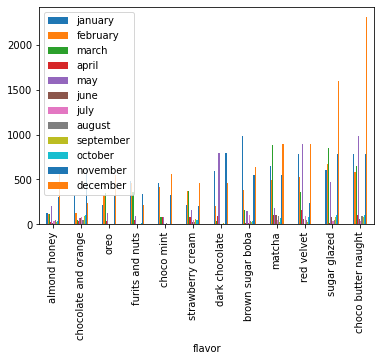

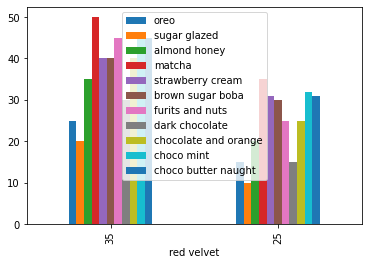

In [67]:
print(df_sales.plot('flavor',[1,2,3,4,5,6,7,8,9,10,11,12],kind = 'bar'))
print(df_prices.plot('red velvet',[1,2,3,4,5,6,7,8,9,10,11],kind = 'bar'))

#### Monthly Sales

#### Flavor Sales

AxesSubplot(0.125,0.125;0.775x0.755)


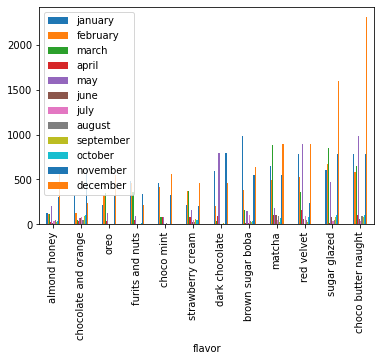

In [68]:
print(df_sales.plot('flavor',[1,2,3,4,5,6,7,8,9,10,11,12],kind = 'bar'))

## Part 4: Business Recommendation and Conclusion
Present the findings of your data analysis and provide recommendations

The three best selling flavors from Bebang's products are red velvet, choco butter naught, and sugar glazed. The months that decreases in sales are June to November while from December to March are the months that profit gradually increases. 
The best way that Aling Bebang can do to increase or maintain her profits as months pass by is do a survey or ask her valuable customers for their suggested new flavors and have some eye-catching promos of her products in months that sales aren't that high.